Lab09 - XOR. Logistic Regression - Eager Execution
 * XOR문제를 Logistic Regression을 통해 풀어보도록 하겠습니다.

# 기본 Library 선언 및 Tensorflow 버전 확인

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)
tf.__version__

'2.3.1'

# 강의 Data
 * x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data를 0과 1로 구분하는 예제입니다.
 * 붉은색과 푸른색으로 0과 1을 표시해보도록 하겠습니다.

Text(0, 0.5, 'x2')

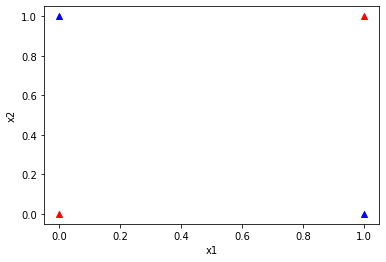

In [3]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1],c='red',marker='^')
plt.scatter(x_data[3][0],x_data[3][1],c='red',marker='^')
plt.scatter(x_data[1][0],x_data[1][1],c='blue',marker='^')
plt.scatter(x_data[2][0],x_data[2][1],c='blue',marker='^')

plt.xlabel('x1')
plt.ylabel('x2')

# Tensorflow Eager

 * Tensorflow data API를 통해 학습시킬 값들을 담는다. (Batch Size는 한번에 학습시킬 Size로 정한다.)
 * features, labels는 실제 학습에 쓰일 Data(연산을 위해 Type을 맞춘다.)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_data,y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
    def __init__(self,nb_classes):
        super(wide_deep_nn,self).__init__()
        
        self.W1 = tf.Variable(tf.random.normal((2,nb_classes)),name='weight1')
        